In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(100)

In [2]:
iris_data = load_iris() 
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

/home/havish/.local/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
def relu(x):
    x[x<0]=0
    return x
def softmax(arr):
#     arr = arr/np.max(arr)
    return np.exp(arr)/(np.sum(np.exp(arr),axis=0))
def diff_relu(arr):
    z = np.zeros(arr.shape)
    z[arr<=0] = 0
    z[arr>0] = 1
    return z

In [4]:
def initializer(fan_out,fan_in):
    limit = np.sqrt(2*1.0/(fan_in+fan_out))
#     return np.random.uniform(-limit,limit,(fan_out,fan_in))
    return np.random.normal(0,limit,(fan_out,fan_in))

In [5]:
### architecture ###
in_dim = 4
hid1_dim = 10
hid2_dim = 10
out_dim = 3
W1 = initializer(hid1_dim,in_dim)
b1 = initializer(hid1_dim,1)
W2 = initializer(hid2_dim,hid1_dim)
b2 = initializer(hid2_dim,1)
W3 = initializer(out_dim,hid2_dim)
b3 = initializer(out_dim,1)

In [6]:
epochs = 500
num_samples = len(train_x)
batch_size = 10
num_batches = num_samples/batch_size
alpha = 0.9
eps = 1e-4
loss1 = []
v = {"W1" : np.zeros(W1.shape) , "W2" : np.zeros(W2.shape) ,"W3" : np.zeros(W3.shape),"b1": np.zeros(b1.shape)
     ,"b2" :np.zeros(b2.shape) , "b3" : np.zeros(b3.shape)}
for i in range(epochs):
    (x_train_subs,y_train_subs) = shuffle(train_x,train_y,random_state = 40)
    loss = 0
    for j in range(int(num_batches)):
        W1_upd = np.zeros((hid1_dim,in_dim))
        b1_upd = np.zeros((hid1_dim,1))
        W2_upd = np.zeros((hid2_dim,hid1_dim))
        b2_upd = np.zeros((hid2_dim,1))
        W3_upd = np.zeros((out_dim,hid2_dim))
        b3_upd = np.zeros((out_dim,1))
        
        W1 = W1 + alpha*v["W1"]
        b1 = b1 + alpha*v["b1"]
        W2 = W2 + alpha*v["W2"]
        b2 = b2 + alpha*v["b2"]
        W3 = W3 + alpha*v["W3"]
        b3 = b3 + alpha*v["b3"]
        for k in range(batch_size):
            z1 = relu(np.matmul(W1,x_train_subs[j]).reshape(-1,1)+b1)
        
            z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)

            out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)
        
            loss = loss + -np.log(out[np.argmax(y_train_subs[j])])
        
            del_3 = out - y_train_subs[j].reshape(-1,1)
            del_2 = np.matmul(W3.T,del_3)*diff_relu(z2)
            del_1 = np.matmul(W2.T,del_2)*diff_relu(z1)

            b3_upd += del_3
#         b3_upd = b3_upd.reshape(len(b3),1)
            b2_upd += del_2
#         b2_upd = b2_upd.reshape(len(b2),1)
            b1_upd += del_1
#         b1_upd = b1_upd.reshape(len(b1),1)
            W3_upd += np.matmul(del_3,z2.T)
            W2_upd += np.matmul(del_2,z1.T)
            W1_upd += np.matmul(del_1,x_train_subs[j].reshape(-1,1).T)
        
        v["W1"] = alpha*v["W1"] - eps*(W1_upd)
        v["W2"] = alpha*v["W2"] - eps*(W2_upd)
        v["W3"] = alpha*v["W3"] - eps*(W3_upd)
        v["b1"] = alpha*v["b1"] - eps*(b1_upd)
        v["b2"] = alpha*v["b2"] - eps*(b2_upd)
        v["b3"] = alpha*v["b3"] - eps*(b3_upd)
        W3 = W3 + v["W3"]
        W2 = W2 + v["W2"]
        W1 = W1 + v["W1"]
        b3 = b3 + v["b3"]
        b2 = b2 + v["b2"]
        b1 = b1 + v["b1"]
    loss1.append(loss)
    print("Epoch: " + str(i) + " Loss: " + str(loss))

Epoch: 0 Loss: [231.2283843]
Epoch: 1 Loss: [103.10987612]
Epoch: 2 Loss: [101.00093985]
Epoch: 3 Loss: [88.32669506]
Epoch: 4 Loss: [73.18538318]
Epoch: 5 Loss: [60.66840056]
Epoch: 6 Loss: [52.42852421]
Epoch: 7 Loss: [47.23640463]
Epoch: 8 Loss: [43.51131435]
Epoch: 9 Loss: [40.92984885]
Epoch: 10 Loss: [39.03442324]
Epoch: 11 Loss: [37.76094229]
Epoch: 12 Loss: [36.50238026]
Epoch: 13 Loss: [35.53039102]
Epoch: 14 Loss: [34.66170121]
Epoch: 15 Loss: [33.83810742]
Epoch: 16 Loss: [33.04749423]
Epoch: 17 Loss: [32.32842439]
Epoch: 18 Loss: [31.64623673]
Epoch: 19 Loss: [30.95173646]
Epoch: 20 Loss: [30.28795879]
Epoch: 21 Loss: [29.62178451]
Epoch: 22 Loss: [28.97780683]
Epoch: 23 Loss: [28.34059338]
Epoch: 24 Loss: [27.72164735]
Epoch: 25 Loss: [27.12366513]
Epoch: 26 Loss: [26.55804361]
Epoch: 27 Loss: [26.01085894]
Epoch: 28 Loss: [25.51217803]
Epoch: 29 Loss: [25.02941212]
Epoch: 30 Loss: [24.59099766]
Epoch: 31 Loss: [24.16816086]
Epoch: 32 Loss: [23.7903573]
Epoch: 33 Loss: [23

Epoch: 287 Loss: [0.27014809]
Epoch: 288 Loss: [0.26864361]
Epoch: 289 Loss: [0.26715404]
Epoch: 290 Loss: [0.2656794]
Epoch: 291 Loss: [0.26421925]
Epoch: 292 Loss: [0.26277362]
Epoch: 293 Loss: [0.26134205]
Epoch: 294 Loss: [0.2599246]
Epoch: 295 Loss: [0.25852083]
Epoch: 296 Loss: [0.25713079]
Epoch: 297 Loss: [0.25575404]
Epoch: 298 Loss: [0.25439064]
Epoch: 299 Loss: [0.25304018]
Epoch: 300 Loss: [0.2517027]
Epoch: 301 Loss: [0.25037788]
Epoch: 302 Loss: [0.24906541]
Epoch: 303 Loss: [0.24776547]
Epoch: 304 Loss: [0.24647789]
Epoch: 305 Loss: [0.24520207]
Epoch: 306 Loss: [0.24393798]
Epoch: 307 Loss: [0.24268584]
Epoch: 308 Loss: [0.2414454]
Epoch: 309 Loss: [0.2402161]
Epoch: 310 Loss: [0.2389979]
Epoch: 311 Loss: [0.23779111]
Epoch: 312 Loss: [0.23659517]
Epoch: 313 Loss: [0.23541006]
Epoch: 314 Loss: [0.23423553]
Epoch: 315 Loss: [0.23307164]
Epoch: 316 Loss: [0.23191807]
Epoch: 317 Loss: [0.23077484]
Epoch: 318 Loss: [0.22964166]
Epoch: 319 Loss: [0.22851857]
Epoch: 320 Loss:

In [7]:
z1 = relu(np.matmul(W1,test_x[4]).reshape(-1,1)+b1)
z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)
out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)

In [8]:
print(out)

[[1.64220864e-10]
 [1.57664409e-03]
 [9.98423356e-01]]


In [9]:
print(test_y[4])

[0. 0. 1.]


In [10]:
preds = []
true = []
# print(np.argmax(out))
for i in range(len(test_x)):
    z1 = relu(np.matmul(W1,test_x[i]).reshape(-1,1)+b1)
    z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)
    out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)
    preds.append(np.argmax(out))
    true.append(np.argmax(test_y[i]))

In [11]:
print(preds)

[2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2]


In [12]:
print(true)

[2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2]


In [13]:
acc =accuracy_score(y_pred=preds,y_true=true)
print(acc)

1.0


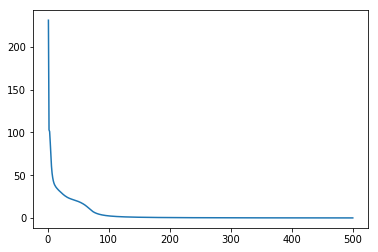

In [14]:
epochs = np.arange(1,501)
plt.plot(epochs,loss1)
plt.show()

In [15]:
for elem in np.array(loss1):
    print(str(elem[0])+',' , end = '')

231.2283842968529,103.10987612278778,101.00093985479928,88.32669505969353,73.18538317707046,60.668400556533825,52.42852421492809,47.2364046317914,43.511314349223966,40.92984885029928,39.03442323894546,37.76094229255115,36.502380261349266,35.53039101931907,34.661701211043244,33.838107417725986,33.04749423047696,32.32842438843492,31.646236728123608,30.951736464930185,30.287958792396545,29.621784509042016,28.977806833487893,28.34059338262265,27.721647347616084,27.12366513209173,26.558043614882386,26.010858944150147,25.512178026495437,25.02941212134341,24.59099766479524,24.16816086342705,23.79035730212456,23.434649472317812,23.11206230346273,22.812845969747098,22.53623047386306,22.277462937330263,22.03215638065645,21.796690694933254,21.566979552611627,21.33980885939497,21.112232302357512,20.881612471026617,20.645792413751607,20.40294917048321,20.15152030044,19.890178069991475,19.618366920629125,19.3303901437666,19.03891561892443,18.728183583496406,18.402780517142894,18.062489825689358,17.7